## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme()
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read the file into pandas data frame and parse the timestamp column as dates
df = pd.read_csv('ab_data.csv', parse_dates=['timestamp'])
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
print(f'The number of rows in the dataset is: {df.shape[0]}')

The number of rows in the dataset is: 294478


c. The number of unique users in the dataset.

In [5]:
print(f'The number of unique users: {df.user_id.nunique()}')

The number of unique users: 290584


d. The proportion of users converted.

In [6]:
print(f'The proportion of users converted is: {df.converted.mean(): .0%}')

The proportion of users converted is:  12%


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# Filter the dataset to the rows where the group and landing page didn't match
unmatched = df.query('group == "treatment" & landing_page != "new_page" | group != "treatment" & landing_page == "new_page"').shape[0]
print(f'The number of unmatched group with the right landing page: {unmatched}')

The number of unmatched group with the right landing page: 3893


f. Do any of the rows have missing values?

In [8]:
# Total number of missing values in any row
df.isnull().any().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Create new df where only the correct rows
df2 = df.query('group == "control" & landing_page == "old_page" | group == "treatment" & landing_page == "new_page"')

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# Number of unique users
print(f'The number of unique users: {df2.user_id.nunique()}')

The number of unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# The unique user id
repeated_user_id = df2.user_id.value_counts().index[0]
print(f'The repeated user id: {repeated_user_id}')

The repeated user id: 773192


c. What is the row information for the repeat **user_id**? 

In [13]:
# Display the rows with the duplicated value
df2.query('user_id ==  @repeated_user_id')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Display the shape before dropping the dupplicated row
print(f'Shape of the data frame before removing the dublicated row: {df2.shape[0]}')

# Drop one of the duplicates
df2 = df2.drop_duplicates('user_id')

# Display the shape after dropping the dupplicated row
print(f'Shape of the data frame after removing the dublicated row: {df2.shape[0]}')

# Make sure we removed the right row
df2.query('user_id ==  @repeated_user_id')

Shape of the data frame before removing the dublicated row: 290585
Shape of the data frame after removing the dublicated row: 290584


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# The probability of conversion regardless the page
print(f'The probabilty of converting regardless of the page they receive : {df2.converted.mean(): .2%}')

The probabilty of converting regardless of the page they receive :  11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# Calculate the probabilty of conversion givin the group was control
control_converted_mean = df2[df2['group'] == 'control'].converted.mean()
print(f"The probabilty of converting given that an individual was in control group : {control_converted_mean: .2%}")

The probabilty of converting given that an individual was in control group :  12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# Calculate the probabilty of conversion givin the group was treatment
treatment_converted_mean = df2[df2['group'] == 'treatment'].converted.mean()
print(f"The probabilty of converting given that an individual was in treatment group : {treatment_converted_mean: .2%}")

The probabilty of converting given that an individual was in treatment group :  11.88%


d. What is the probability that an individual received the new page?

In [20]:
# Calculating the probability of receiving the new page
p_new = df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]
print(f"The probabilty of receiving the new page : {p_new: .2%}")

The probabilty of receiving the new page :  50.01%


In [21]:
# Calculate the observed difference 
obs_diff = treatment_converted_mean - control_converted_mean
obs_diff

-0.0015782389853555567

In [22]:
# Display the duration of the experience
print(f'The duration for this experment was: {df2.timestamp.max() - df2.timestamp.min()}')

The duration for this experment was: 21 days 23:59:49.081927


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

The probabilty of converting given the new page is `11.88%` and givin the old one is `12.04%` with the information we have until now they should stay with the old page as it apears that the probabilty of converting is more than the new one but we need to wait for more time for the old users to get use to the new page design.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: P_{new} - P_{old} \leq 0$$
$$H_1: P_{new} - P_{old} > 0$$
$$\alpha = 0.05$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
# Calculate p_new under the null
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
# Calculate p_old under the null
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [25]:
# Calculate the number of individuals received the new page
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [26]:
# Calculate the number of individuals received the old page
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
# Calculate the new page conversion under the null for n_new times
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
# Calculate the old page conversion under the null for n_old times
old_page_converted = np.random.binomial(1, p_old, n_old)

In [31]:
# Calculate the difference in means between the conversion rate for the new and the old pages
differenc_in_means = new_page_converted.mean() - old_page_converted.mean()
differenc_in_means

0.001732206876956341

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
from IPython.display import display, Math, Latex
display(Math(rf'P_{{new}} - P_{{old}} = {differenc_in_means:.7f}'))

<IPython.core.display.Math object>

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [35]:
# Simulate p_new 10000 times
new_page_mean = np.random.binomial(n_new, p_new, 10000)/n_new

# Simulate p_old 10000 times
old_page_mean = np.random.binomial(n_old, p_old, 10000)/n_old

# Calculate the difference between p_new and p_old
p_diffs = new_page_mean - old_page_mean

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

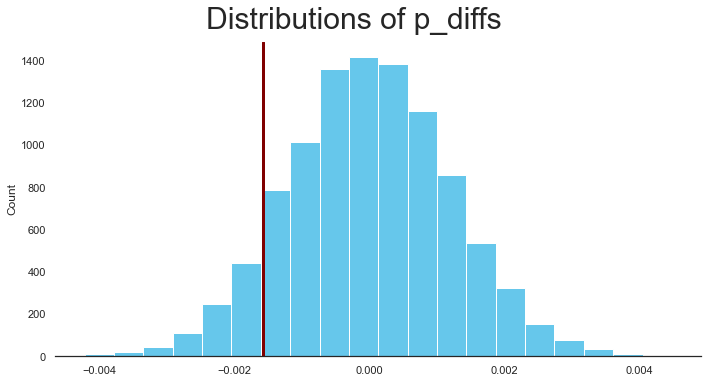

In [36]:
# Plot the distribution of p_diffs
sns.set_style('white')
sns.displot(p_diffs, bins=20, height=5, aspect=2, color='#33b5e5')
sns.despine(left=True)
plt.figtext(.5,1,'Distributions of p_diffs',fontsize=30,ha='center')
plt.axvline(x=obs_diff, color='#800000', linewidth=3)
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
# Calculate the p value under the null
p_val = (p_diffs > obs_diff).mean()
p_val

0.9094

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- We just computed p value or the probabilty of observing our statistic or more extreme in favor of the alternative given that the null hypothesis is true.
- Here we fail to reject the null and so we containue with the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

# The number of rows where the group is control and converted
convert_old = df2.query('group == "control" and converted == 1').shape[0]

# The number of rows where the group is treatment and converted
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]

# The count of control group
n_old = df2.query('group == "control"').shape[0]

# The count of treatment group
n_new = df2.query('group == "treatment"').shape[0]

# Display the numbers we calculated
print(f'convert_old: {convert_old}\n\
      n_old: {n_old}\n\
convert_new: {convert_new}\n\
      n_new: {n_new}')

convert_old: 17489
      n_old: 145274
convert_new: 17264
      n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
# Calculating Z score and P value with the stats model
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(f'Z score is: {z_score:.3f}\nand the P value is: {p_value:.3f}')

Z score is: 1.311
and the P value is: 0.905


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- Here also our conclusion is the same as in part j we fail to reject the null as we got similar results as we expected.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- Logistic Regression 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
# Add intercept column to the data frame
df2['intercept'] = 1

# Add ab_page colum as a dummy variable colum
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

# Display the first 5 rows from our df
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
# The response y
y = df2.converted

# The explanatory variables X
X = df2[['intercept','ab_page']]

# Create the model
model = sm.Logit(y, X)

# Fit the model
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
# Display the summary statistics of our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Oct 2020   Pseudo R-squ.:               8.077e-06
Time:                        12:02:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

In logistic regression we have a 2 sided test there fore the null and alternetive hypothesis are:
$$H_0: P_{new} - P_{old} = 0$$
$$H_1: P_{new} - P_{old} \neq 0$$
and before we had a one side test as:
$$H_0: P_{new} - P_{old} \leq 0$$
$$H_1: P_{new} - P_{old} > 0$$

### Colculsion
With a p_value of 0.190 higher than our $\alpha$ rate we fail to reject the null and so we will containue to use the old page

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- We should consider other things that might influence wether or not an individual converts like having more details about the users as their sex, location and age and we then we can test for each group and see if the page have more inpact in once category than the other
- And the disadvantages for this approach it will consume more time, efforts and it will cost more.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [45]:
### Create the necessary dummy variables
df_new = df_new.join(pd.get_dummies(df_new['country']))
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [46]:
# Using the countries columns in the model
y = df_new.converted
X = df_new[['intercept','ab_page', 'US', 'UK']]
model = sm.Logit(y, X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Oct 2020   Pseudo R-squ.:               2.323e-05
Time:                        12:09:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

### Conculsion
It doesn`t apear that adding the countries would affect the results as all the p values are large and we will still fail to reject the null and containue with the old page for all countries

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
### Fit Your Linear Model And Obtain the Results

# Add new columns US_ab_page and UK_ab_page by multiplying the country colum with the ab_page
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']

# The response variable y
y = df_new.converted

# The explanatory variables X
X = df_new[['intercept','ab_page', 'US', 'UK', 'US_ab_page', 'UK_ab_page']]

# Create the model
model = sm.Logit(y, X)

# Fir the model
results = model.fit()

# Display the summary statistics
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 08 Oct 2020   Pseudo R-squ.:               3.482e-05
Time:                        12:17:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

In [49]:
interpretation = pd.DataFrame(results.params, columns=['coef']).drop('intercept', axis=0)
interpretation['exp'] = interpretation.coef.astype('float').apply(lambda x: np.exp(x) if x > 0 else 1/np.exp(x))
interpretation

,coef,exp
ab_page,-0.067448,1.069775
US,0.017528,1.017682
UK,0.011784,1.011854
US_ab_page,0.046885,1.048001
UK_ab_page,0.078282,1.081428


### Conclusions

- All the p values for the explanatory variables are larger than $\alpha$ there for we fail to reject the null hypothesis               again.
- For the new page the chance of conversion is less than the old page by 1.02%.
- For US the chance of conversion is more than CA by 1.04%.
- For UK the chance of conversion is more than CA by 1.05%.

### Finaly
Based on the datasets(ab_data.csv and the countries.csv) and the tests we ran
- It might help if we run our experiment for longer time to account for change in behavior.
- If we will not consider running the experiment for longer time my advice to containue using the old page. 